In [31]:
import pandas as pd
import sqlite3

connection = sqlite3.connect('../data/checking-logs.sqlite')

df = pd.io.sql.read_sql("SELECT uid, datetime FROM pageviews WHERE uid LIKE 'user_%'",
                            connection, parse_dates=['datetime'])
df = df.groupby(by=df['datetime'].dt.date).count()['uid'].reset_index()
df.columns = ['date', 'views']
df = df.set_index('date')
df.head()

,views
date,
2020-04-17,1
2020-04-18,23
2020-04-19,15
2020-04-21,3
2020-04-22,1


In [32]:
df2 = pd.io.sql.read_sql("SELECT uid, timestamp FROM checker WHERE uid LIKE 'user_%'",
                            connection, parse_dates=['timestamp'])
df2 = df2.groupby(by=df2['timestamp'].dt.date).count()['uid'].reset_index()
df2.columns = ['date', 'commits']
df2 = df2.set_index('date')
df2.head()

,commits
date,
2020-04-17,23
2020-04-18,69
2020-04-19,33
2020-04-20,25
2020-04-21,25


In [33]:
df3 = pd.concat([df, df2], axis=1)
df3 = df3.dropna()
df3.head()

,views,commits
date,,
2020-04-17,1.0,23.0
2020-04-18,23.0,69.0
2020-04-19,15.0,33.0
2020-04-21,3.0,25.0
2020-04-22,1.0,28.0


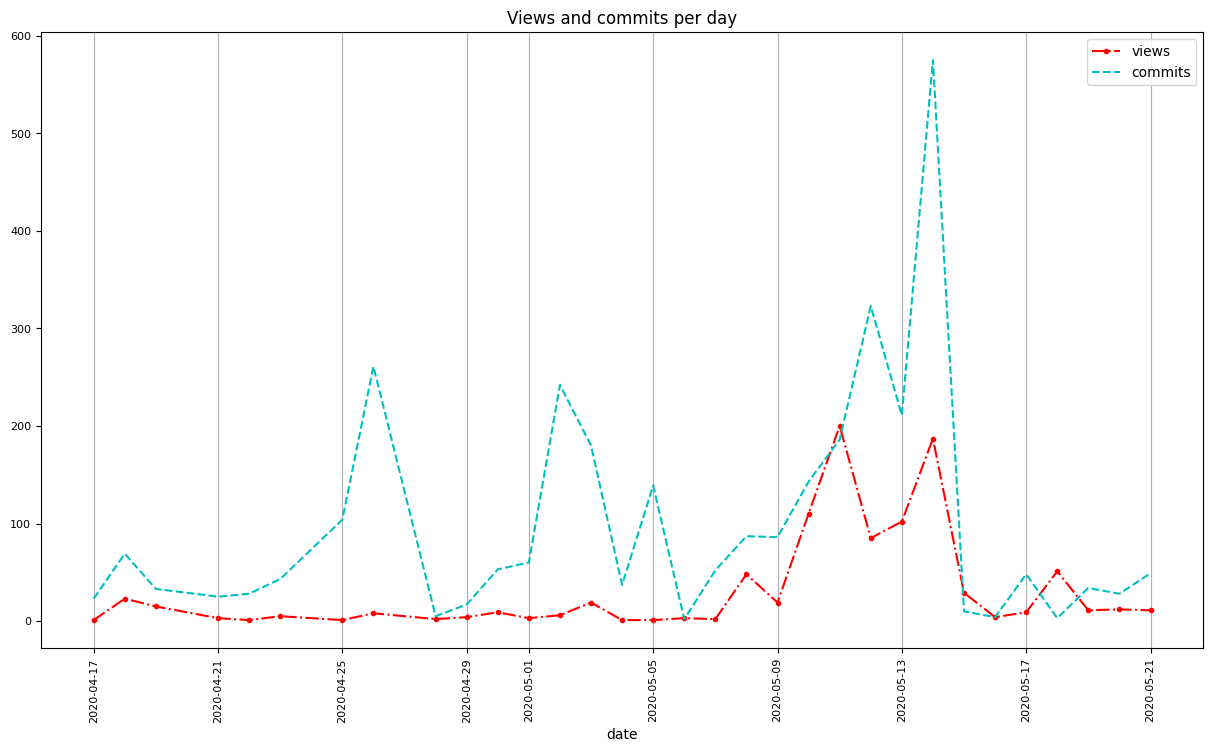

In [34]:
graph = df3.plot(fontsize=8, figsize=(15,8), title='Views and commits per day',
                    style=['r.-.', 'c--'], rot=90)
graph.grid(axis='x')

In [35]:
connection.close()

# How many times was the number of views larger than 150?
# The answer is 2